In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Concatenate , Add, Dot, Activation
from tensorflow.keras.models import Model


from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from tensorflow.python.client import device_lib
#tf.disable_v2_behavior()

#print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.__version__ )

%matplotlib inline
%load_ext autoreload
%autoreload 2

Num GPUs Available:  1
2.9.1


In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import decode_predictions

model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [67]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.ndimage import rotate
import imutils

#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

def load_img(img_path,img_shape, preprocess=True, angle=0):
    
    img_rows=img_shape[0]
    img_cols=img_shape[1]
    #num_channel=img_shape[2]


    img = image.load_img(img_path , target_size=(img_rows, img_cols))    
    #img = rotate(img, angle, reshape=False)
    img = imutils.rotate(np.array(img), angle=angle)
    if preprocess:
        img = image.img_to_array(img) 
        img = np.expand_dims(img, axis=0)

        img =  preprocess_input(img)
        return img

    #data = np.array(data)
    #data = data.astype('float32')
    #data /= 255
    #labels=np.array(labels)
    #print('data shape',data.shape)
    #print('labels shape',labels.shape)
    return np.array(img)

In [5]:
def get_cnn_out(input, layer_num):
    get_layer_output = K.function([model.input], [l.output for l in model.layers][layer_num])
    layer_out = np.array(get_layer_output(input))
    return layer_out[0]

(1, 224, 224, 3)


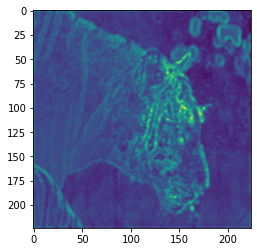

In [6]:
img  = load_img('test_images/tiger_no_license.jpg', angle=0, img_shape=(224,224))
print(img.shape)
plt.imshow(np.mean(get_cnn_out(img, 2), axis=2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


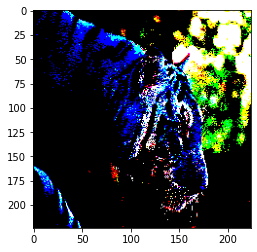

In [7]:
plt.imshow(img[0])

MovieWriter imagemagick unavailable; using Pillow instead.


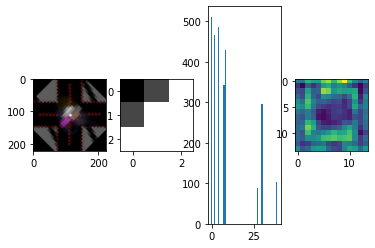

In [91]:

from tkinter import Y
from matplotlib.animation import FuncAnimation

import time
fig, ax = plt.subplots(1,4)
fig.set_tight_layout(False)

i=1

def update(i):
    label = 'timestep {0}'.format(i)

    img  = load_img('test_images/piano_zoom.png', angle=i*45, img_shape=(224,224),preprocess=False)
    img_in = load_img('test_images/piano_zoom.png', angle=i*45, img_shape=(224,224), preprocess=True)

    ax[0].imshow(img)

    ax[1].imshow(img_in[0, 111:114, 111:114, 1], cmap='gray')
    ax[2].clear()

    ax[2].bar(get_cnn_out(img_in, 17)[7, 7, :], np.arange(0, 512))
    ax[3].imshow(np.mean(get_cnn_out(img_in, 17), axis=-1))

    return ax



anim = FuncAnimation(fig, update, frames=np.arange(0, 8), interval=400)

anim.save('video_out/testMov.gif', dpi=80, writer='imagemagick')

In [14]:
np.arange(0, 64)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [25]:
get_cnn_out(img_in, 2)[124, 124,:]

array([373.74936  , 267.91452  ,   2.7877333, 129.74243  , 206.22734  ,
         0.       ,   0.       ,  40.715084 , 175.11577  ,   0.       ,
       216.32344  ,   0.       ,   0.       ,   0.       ,   0.       ,
        70.12767  , 141.98158  , 352.6563   , 199.68912  , 135.81592  ,
       311.29782  ,   0.       , 208.35574  ,   0.       ,   0.       ,
         0.       ,   0.       ,  29.552244 , 720.6922   , 508.341    ,
         0.       ,   0.       , 448.66074  , 213.23112  , 254.12428  ,
         0.       ,   0.       , 759.8075   ,   0.       , 154.04718  ,
       771.3025   ,   0.       , 162.38773  , 366.5662   ,   0.       ,
       220.79616  ,   0.       ,   0.       , 174.43588  , 140.13396  ,
         0.       ,   0.       , 178.2452   ,   0.       ,   0.       ,
         4.6577616,   0.       , 352.37286  ,   0.       ,   0.       ,
        63.408257 , 242.18349  , 141.31052  , 210.1856   ], dtype=float32)

In [112]:
m = np.array('''-21, -23, -18;
              -19, 0, -61.5; 
              -25, -21, 62''')


c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
np.transpose(m)

array([list([-21, -23, -18]), list([-19, 0, -61.5]),
       list([-25, -21, 62, 5])], dtype=object)